In [3]:
import numpy as np
import astropy.io.fits as pyf
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import product
from tqdm import tqdm
import time
import h5py

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.style.use("dark_mode")

def hd5_open(file_name):
    f=h5py.File(file_name,'r', swmr=True)
    data = f['data'][:]
    f.close()
    return data

# Load in Data

In [45]:
#load in data
save_dirs_dict = {0: 'Ms_0p7__Ma_0p7',
                  1: 'Ms_0p7__Ma_2p0',
                  2: 'Ms_2p0__Ma_0p7',
                  3: 'Ms_2p0__Ma_2p0'}

attempt = 'Attempt_2'

data_real_0 = hd5_open(f'{save_dirs_dict[0]}/3PCF/{attempt}/Coefficients_3PCF_real.h5')
data_imag_0 = hd5_open(f'{save_dirs_dict[0]}/3PCF/{attempt}/Coefficients_3PCF_imag.h5')

data_real_1 = hd5_open(f'{save_dirs_dict[1]}/3PCF/{attempt}/Coefficients_3PCF_real.h5')
data_imag_1 = hd5_open(f'{save_dirs_dict[1]}/3PCF/{attempt}/Coefficients_3PCF_imag.h5')

data_real_2 = hd5_open(f'{save_dirs_dict[2]}/3PCF/{attempt}/Coefficients_3PCF_real.h5')
data_imag_2 = hd5_open(f'{save_dirs_dict[2]}/3PCF/{attempt}/Coefficients_3PCF_imag.h5')

data_real_3 = hd5_open(f'{save_dirs_dict[3]}/3PCF/{attempt}/Coefficients_3PCF_real.h5')
data_imag_3 = hd5_open(f'{save_dirs_dict[3]}/3PCF/{attempt}/Coefficients_3PCF_imag.h5')


flattened_data_real_0,flattened_data_imag_0  = [], []
flattened_data_real_1,flattened_data_imag_1  = [], []
flattened_data_real_2,flattened_data_imag_2  = [], []
flattened_data_real_3,flattened_data_imag_3  = [], []

for i in range(len(data_real_0)):
    flattened_data_real_0.append(data_real_0[i].flatten())
    flattened_data_imag_0.append(data_imag_0[i].flatten())
    
    flattened_data_real_1.append(data_real_1[i].flatten())
    flattened_data_imag_1.append(data_imag_1[i].flatten())
    
    flattened_data_real_2.append(data_real_2[i].flatten())
    flattened_data_imag_2.append(data_imag_2[i].flatten())
    
    flattened_data_real_3.append(data_real_3[i].flatten())
    flattened_data_imag_3.append(data_imag_3[i].flatten())
    
flattened_data_real_0, flattened_data_imag_0 = np.array(flattened_data_real_0),np.array(flattened_data_imag_0)
flattened_data_real_1, flattened_data_imag_1 = np.array(flattened_data_real_1),np.array(flattened_data_imag_1)
flattened_data_real_2, flattened_data_imag_2 = np.array(flattened_data_real_2),np.array(flattened_data_imag_2)
flattened_data_real_3, flattened_data_imag_3 = np.array(flattened_data_real_3),np.array(flattened_data_imag_3)

In [46]:
MHD_data_real = np.array([flattened_data_real_0,
                          flattened_data_real_1,
                          flattened_data_real_2,
                          flattened_data_real_3])

MHD_data_imag = np.array([flattened_data_imag_0,
                          flattened_data_imag_1,
                          flattened_data_imag_2,
                          flattened_data_imag_3])

MHD_data_all = np.array([np.append(flattened_data_real_0, flattened_data_imag_0, axis=1),
                         np.append(flattened_data_real_1, flattened_data_imag_1, axis=1),
                         np.append(flattened_data_real_2, flattened_data_imag_2, axis=1),
                         np.append(flattened_data_real_3, flattened_data_imag_3, axis=1)])

MHD_data_all.shape

(4, 1404, 2200)

In [47]:
flattened_data_real_0.shape

(1404, 1100)

# LDA Analysis

In [48]:
# create x-data vector
X_data = np.abs(np.concatenate(MHD_data_real,axis=0))

# create y-data labels
Y_data = np.repeat(np.array([0,1,2,3]),
                  (MHD_data_all.shape[1],
                   MHD_data_all.shape[1],
                   MHD_data_all.shape[1],
                   MHD_data_all.shape[1]))

label_list = ['Ms_0p7__Ma_0p7',
              'Ms_0p7__Ma_2p0',
              'Ms_2p0__Ma_0p7',
              'Ms_2p0__Ma_2p0']

# Setup for LDA
n_components = 3
sc = StandardScaler()

# Seperate data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)

#fit the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# perform LDA and Train
lda_fit = LDA(n_components=n_components)
X_train = lda_fit.fit_transform(X_train, Y_train)

# make predictions
Y_pred = lda_fit.predict(X_test)
X_test = lda_fit.transform(X_test)

#scoring
C_matrix = confusion_matrix(Y_test, Y_pred)
P_score = precision_score(Y_test, Y_pred, average='micro')

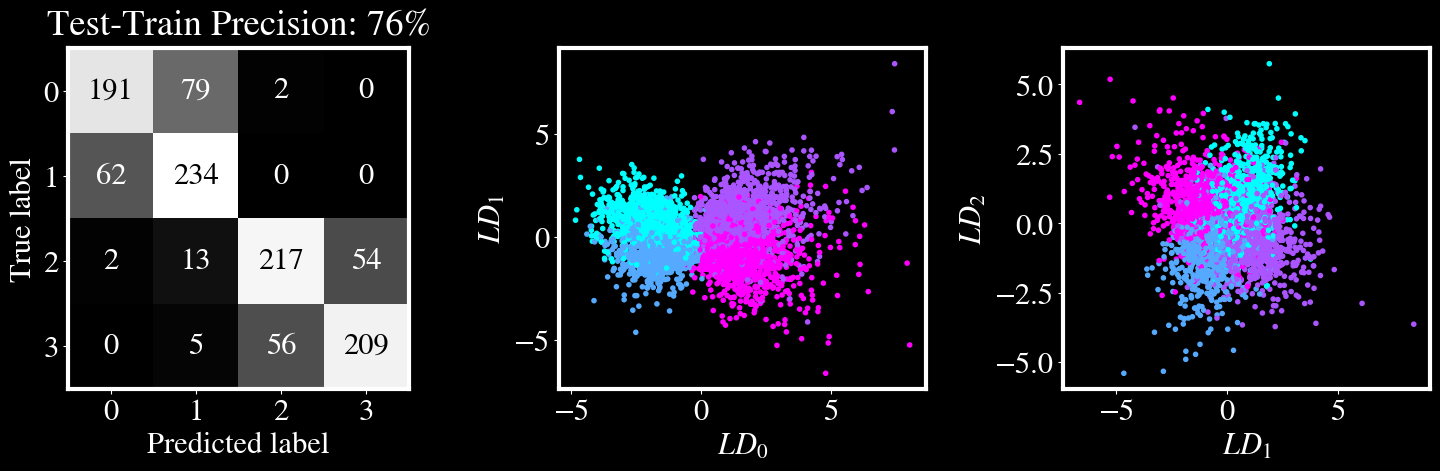

In [49]:
display_C_Matrix = ConfusionMatrixDisplay(confusion_matrix=C_matrix,
                              display_labels=[0,1,2,3])


f, axes = plt.subplots(1,3, figsize=(15,5))

display_C_Matrix.plot(ax=axes[0], cmap="Greys_r", colorbar=False)
axes[0].set_title(f"Test-Train Precision: {P_score*100:0.0f}%", pad = 10)

axes[1].scatter(X_train[:,0], X_train[:,1], marker=".", c=Y_train, cmap='cool')
axes[1].set_ylabel("$LD_1$")
axes[1].set_xlabel("$LD_0$")

im = axes[2].scatter(X_train[:,1], X_train[:,2],marker=".", c=Y_train, cmap='cool')
axes[2].set_ylabel("$LD_2$")
axes[2].set_xlabel("$LD_1$")
plt.tight_layout()

In [28]:
# create x-data vector
X_data = np.abs(np.concatenate(MHD_data_real, axis=0))

# create y-data labels
Y_data = np.repeat(np.array([0,1,2,3]),
                  (MHD_data_all.shape[1],
                   MHD_data_all.shape[1],
                   MHD_data_all.shape[1],
                   MHD_data_all.shape[1]))

label_list = ['Ms_0p7__Ma_0p7',
              'Ms_0p7__Ma_2p0',
              'Ms_2p0__Ma_0p7',
              'Ms_2p0__Ma_2p0']

# Setup for LDA
n_components = 3
sc = StandardScaler()

# Seperate data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.1, random_state=0)

#fit the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# perform LDA and Train
qda_fit = QDA()
X_train = qda_fit.fit(X_train, Y_train)

# make predictions
Y_pred = qda_fit.predict(X_test)
# X_test = qda_fit.transform(X_test)

#scoring
C_matrix = confusion_matrix(Y_test, Y_pred)
P_score = precision_score(Y_test, Y_pred, average='micro')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# Various Other Classifiers

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

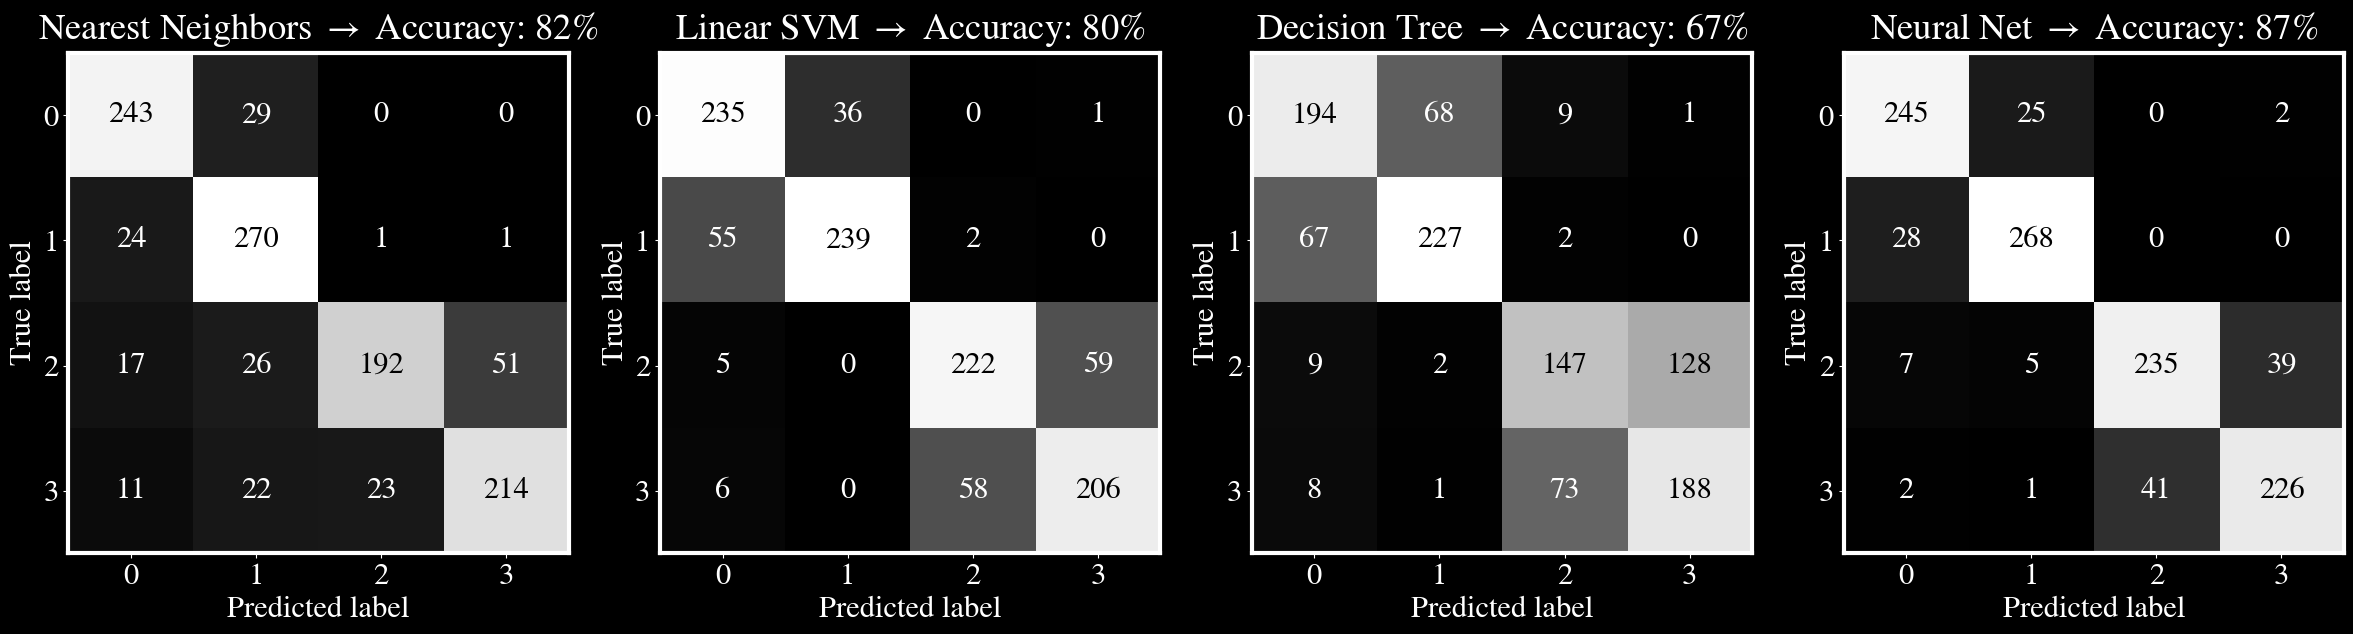

In [52]:
# create x-data vector
X_data = np.concatenate(MHD_data_real,axis=0)

# create y-data labels
Y_data = np.repeat(np.array([0,1,2,3]),
                  (MHD_data_all.shape[1],
                   MHD_data_all.shape[1],
                   MHD_data_all.shape[1],
                   MHD_data_all.shape[1]))

label_list = ['Ms_0p7__Ma_0p7',
              'Ms_0p7__Ma_2p0',
              'Ms_2p0__Ma_0p7',
              'Ms_2p0__Ma_2p0']



# Seperate data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)

# setup classifiers
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Decision Tree",
    "Neural Net",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(alpha=1, max_iter=1000),
]


#run classifiers
f, axes = plt.subplots(1,4, figsize=(24,8))
i = 0
for name, clf in zip(names, classifiers):
    
    #fitting
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, Y_train)

    # make predictions
    Y_pred = clf.predict(X_test)

    #scoring
    C_matrix = confusion_matrix(Y_test, Y_pred)
    P_score = precision_score(Y_test, Y_pred, average='micro')
    
    display_C_Matrix = ConfusionMatrixDisplay(confusion_matrix=C_matrix,
                              display_labels=[0,1,2,3])


    
    #plotting
    display_C_Matrix.plot(ax=axes[i], cmap="Greys_r", colorbar=False)
    axes[i].set_title(f"{name} $\\rightarrow$ Accuracy: {P_score*100:0.0f}%", pad = 10)
    
    i += 1
    
plt.tight_layout()
plt.show()

In [56]:
N_array_slices = 3 * 52
N_time_slices = 9
N_sims = 4
time_per_iter = 105

total_time = ((N_array_slices * N_time_slices * N_sims) * time_per_iter) / 60 / 60 #hours
print(total_time / 4)

40.95


In [57]:
256/8

32.0